In [81]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns

In [20]:
%matplotlib inline

In [2]:
np.random.seed(989)

### Data Generation

We will generate 4 random 1000 point arrays `X[:4]`.  
From these four arrays we will generate our `Y` using a series of `coeffs`.

In [3]:
# Generate the first four variables
X = np.random.uniform(size=(4, 1000))

# Coefficients
coeffs = np.array([2, -3, 5, .2])

# Get the Y based on the coefficients
Y = coeffs @ X

We will generate more data, by adding additional random noise, as well as some linear combinations of the original variables

In [4]:
# Generate the rest of the data.. some random of different magnitudes (5 - 39)
X = np.vstack([X,
               np.random.uniform(low=-10, high=10, size=(10, 1000)),
               np.random.uniform(low=-100, high=100, size=(20, 1000)),
               np.random.uniform(low=10, high=20, size=(6, 1000)) ])

# others correlated (40 - 49) with the actual we have
X = np.vstack([X,
               2*X[0],
               12*X[1],
               -.3*X[2],
               -5*X[3],
               -5*X[1] * 2*X[1],
               2*X[20],
               .1*X[20] + X[31] - 100*X[11],
               -.05*X[17] + .01*X[9],
               X[38] + X[39],
               X[8] + X[9] + X[10] + X[11] ])

### Ridge Regression

__The effect of the alpha__

In [41]:
df = pd.DataFrame()

for a in [1e-50, 1e-40, 1e-30, 1e-25, 1e-20, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 2, 5, 10,
          15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 1000, 2000, 3000, 5000, 10000]:
    _model = Ridge(alpha=a, normalize=True)
    _model.fit(X.T, Y)
    df[str(a)] = _model.coef_

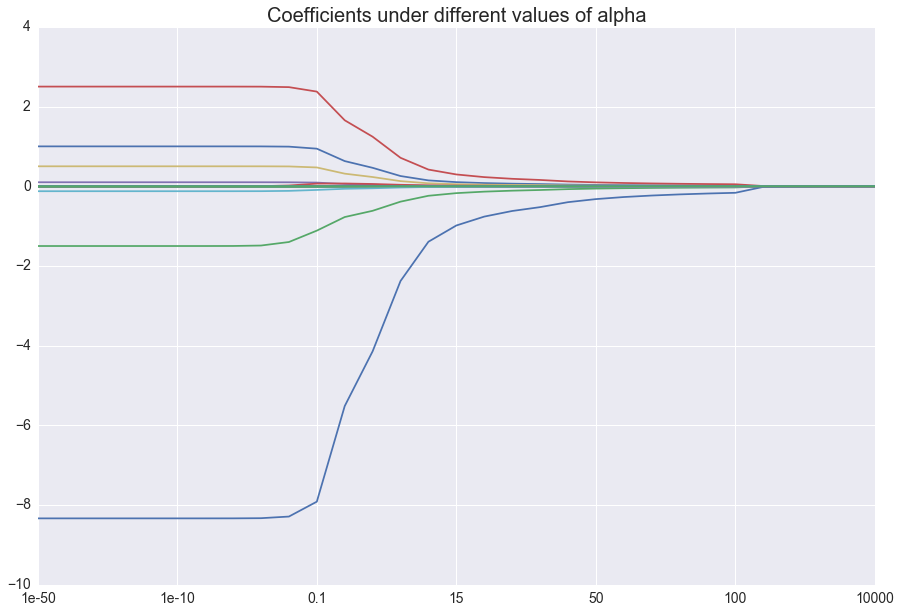

In [127]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
df.T.plot(ax=ax, legend=False, fontsize=14)

plt.title('Coefficients under different values of alpha', size=20)
plt.show()

### Linear Regression (no regularization)
Let's compare the `LinearRegression` model with the `Ridge` in which we set `alpha` to be `0`

In [43]:
df2 = pd.DataFrame()

_model = LinearRegression(normalize=True)
_model.fit(X.T, Y)
df2['LinReg'] = _model.coef_

_model2 = Ridge(alpha=0, normalize=True)
_model2.fit(X.T, Y)
df2['Ridge_0'] = _model2.coef_

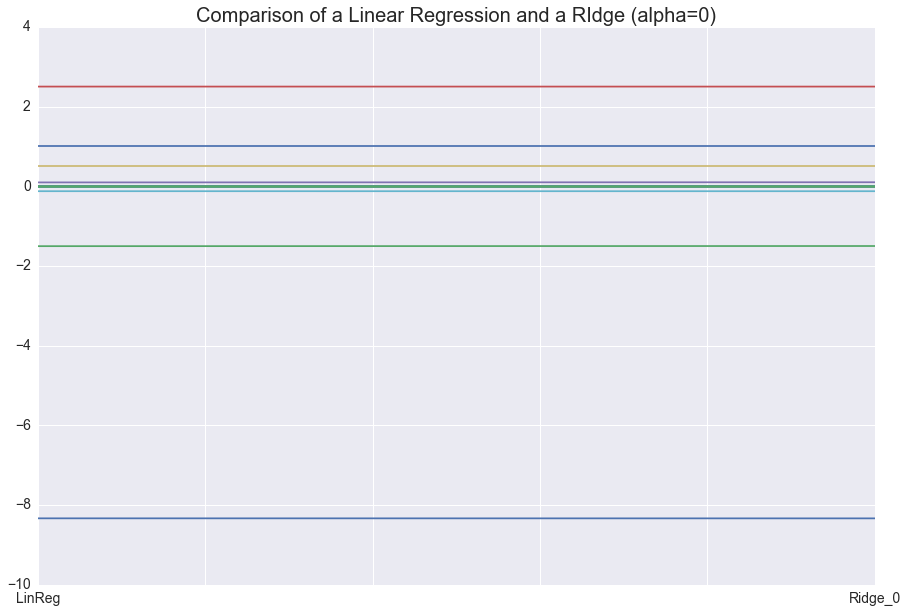

In [128]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
df2.T.plot(ax=ax, legend=False, fontsize=14)

plt.title('Comparison of a Linear Regression and a Ridge (alpha=0)', size=20)
plt.show()

### Variation of predictors

In this subsection we explore the effect of having different number of (unnecessary predictors) on both the Linear and the Ridge

In [83]:
# Show what happens with less candidate predictors
df3 = pd.DataFrame()

for num_vars in [40, 30, 20, 10, 5, 2]:
    _model3 = LinearRegression(normalize=True)
    _model3.fit(X[:num_vars,:].T, Y)
    
    # correct for when there are less coefficients (fill with zeroes)
    _coefs = np.zeros(shape=(50,))
    _coefs[:_model3.coef_.size] = _model3.coef_
    df3['LR_{}_vars'.format(num_vars)] =_coefs


df4 = pd.DataFrame()

for num_vars in [40, 30, 20, 10, 5, 2]:
    _model4 = Ridge(alpha=1, normalize=True)
    _model4.fit(X[:num_vars,:].T, Y)
    # correct for when there are less coefficients (fill with zeroes)
    _coefs = np.zeros(shape=(50,))
    _coefs[:_model4.coef_.size] = _model4.coef_
    df4['Ridge_{}_vars'.format(num_vars)] = _coefs


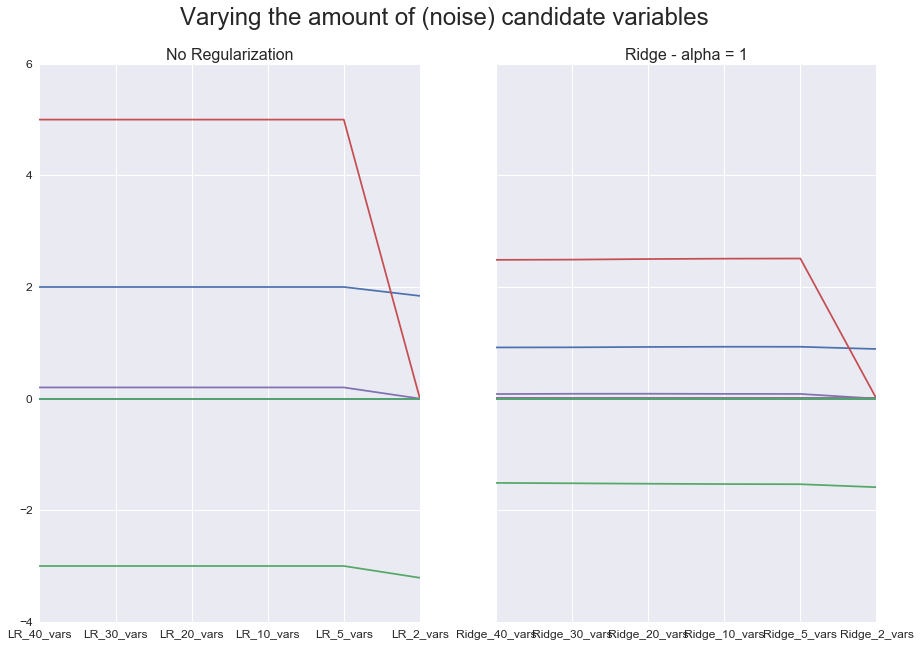

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

df3.T.plot(figsize=(15,10), ax=axes[0], legend=False, fontsize=12)
axes[0].set_title('No Regularization', size=16)
df4.T.plot(figsize=(15,10), ax=axes[1], legend=False, fontsize=12)
axes[1].set_title('Ridge - alpha = 1', size=16)

plt.suptitle('Varying the amount of (noise) candidate variables', size=24)

plt.show()

### Compare predictions

In [141]:
inds = Y.argsort()

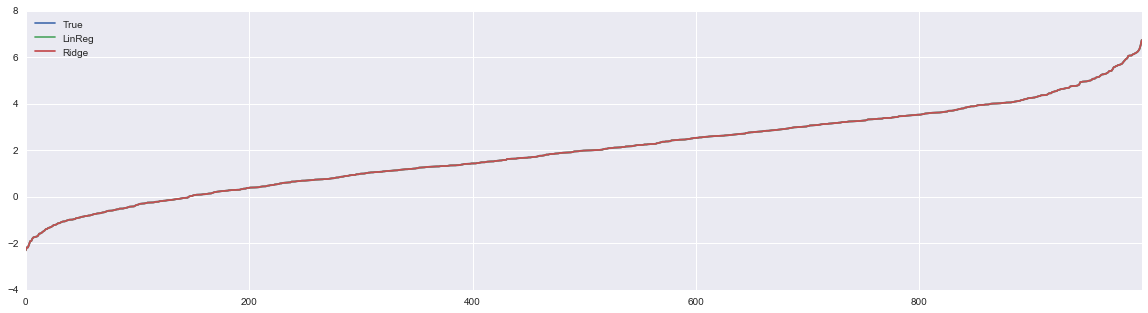

In [142]:
# Show Prediction
df_pred = pd.DataFrame(Y[inds], columns=['True'])
df_pred['LinReg'] = _model.predict(X.T)[inds]
df_pred['Ridge'] = _model2.predict(X.T)[inds]

df_pred.plot(figsize=(20,5))
plt.show()

In [117]:
sum(Y - _model.predict(X.T))

-7.8835375727503987e-14

In [118]:
sum(Y - _model2.predict(X.T))

2.4730651554394356e-14

Although they look the same, they are effectively different as seen in the sum of errors...

To be continued...